<a href="https://colab.research.google.com/github/Remonah-3/Github_Assignment/blob/master/Iris_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

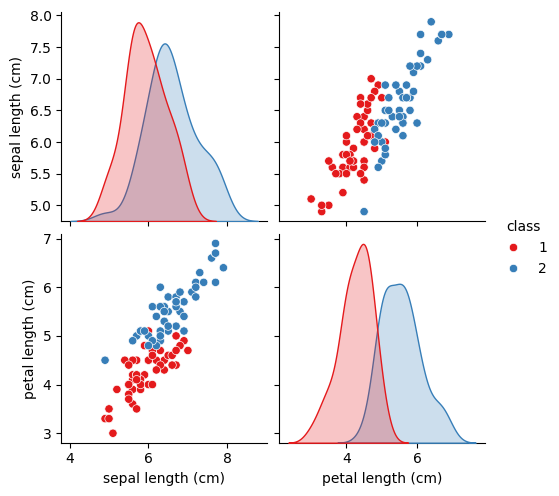

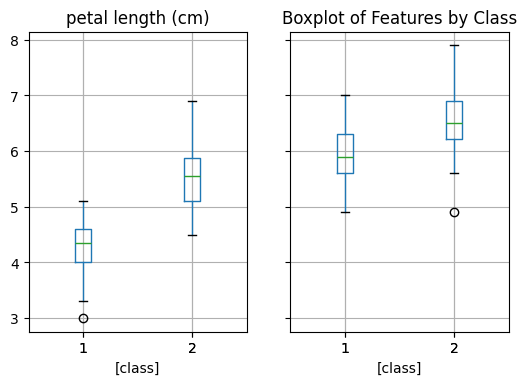

/tmp/ipython-input-1923996604.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='class', y='sepal length (cm)', data=df_bin, palette=['red','blue'])


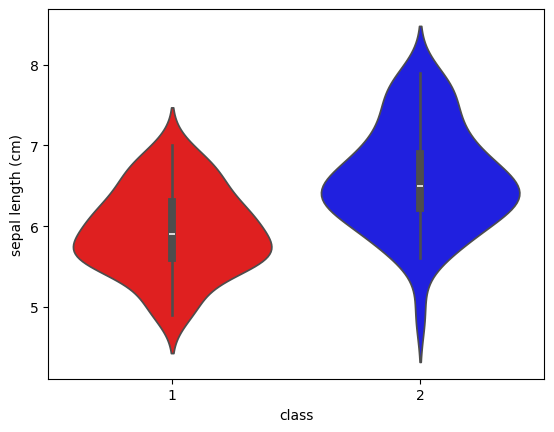

/tmp/ipython-input-1923996604.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='class', y='petal length (cm)', data=df_bin, palette=['red','blue'])


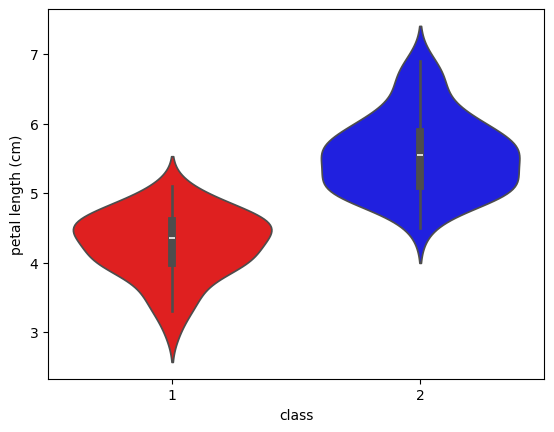

=== KNN ===
Accuracy: 0.8
Precision: 0.8
Recall: 0.8571428571428571
F1 Score: 0.8275862068965517
Confusion Matrix:
 [[12  2]
 [ 3  8]]


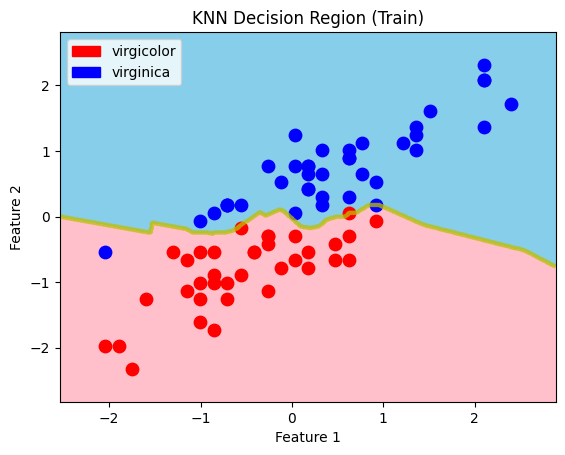

=== Logistic Regression ===
Accuracy: 0.84
Precision: 0.8571428571428571
Recall: 0.8571428571428571
F1 Score: 0.8571428571428571
Confusion Matrix:
 [[12  2]
 [ 2  9]]


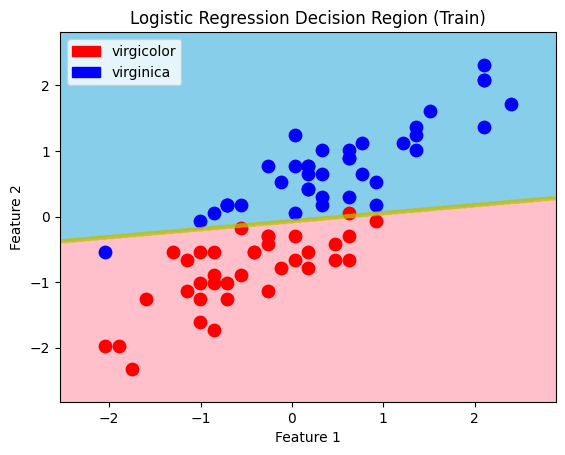

=== SVM ===
Accuracy: 0.84
Precision: 0.8571428571428571
Recall: 0.8571428571428571
F1 Score: 0.8571428571428571
Confusion Matrix:
 [[12  2]
 [ 2  9]]


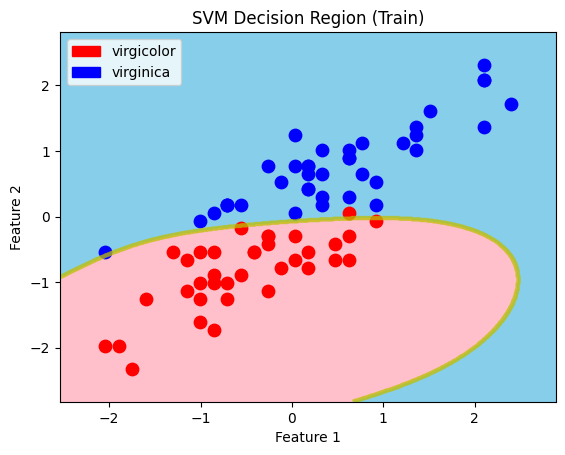

=== Decision Tree ===
Accuracy: 0.84
Precision: 0.8125
Recall: 0.9285714285714286
F1 Score: 0.8666666666666667
Confusion Matrix:
 [[13  1]
 [ 3  8]]


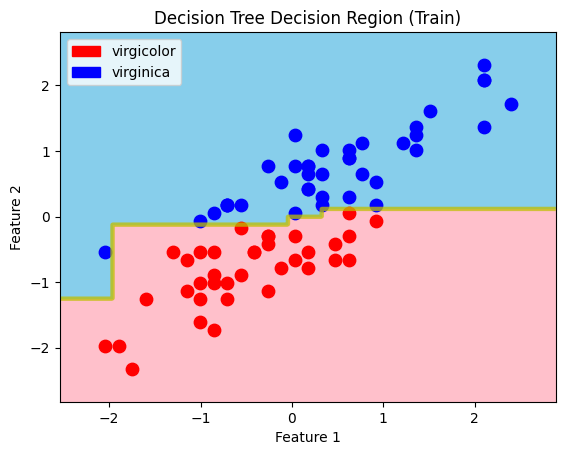

=== Random Forest ===
Accuracy: 0.84
Precision: 0.8125
Recall: 0.9285714285714286
F1 Score: 0.8666666666666667
Confusion Matrix:
 [[13  1]
 [ 3  8]]


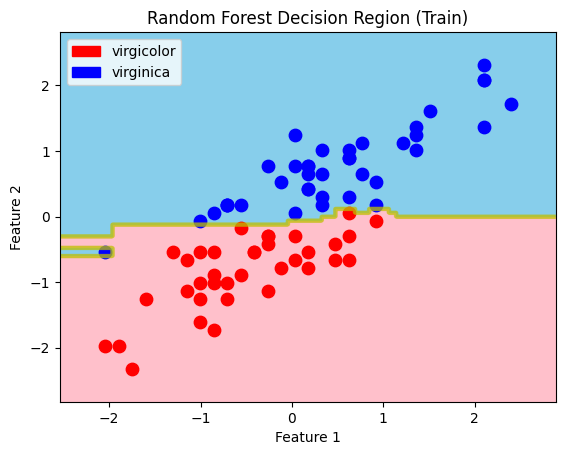

KNN multi-class accuracy: 1.0
Logistic Regression multi-class accuracy: 1.0
SVM multi-class accuracy: 1.0
Decision Tree multi-class accuracy: 1.0
Random Forest multi-class accuracy: 1.0


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

iris = datasets.load_iris(as_frame=True)
X = iris['data']
y = iris['target']

X_bin = X[(y==1) | (y==2)][['sepal length (cm)', 'petal length (cm)']]
y_bin = y[(y==1) | (y==2)]

sns.pairplot(pd.concat([X_bin, y_bin.rename('class')], axis=1), hue='class', palette='Set1')
plt.show()

df_bin = X_bin.copy()
df_bin['class'] = y_bin.values

df_bin.boxplot(by='class', figsize=(6,4))
plt.title('Boxplot of Features by Class')
plt.suptitle('')
plt.show()

sns.violinplot(x='class', y='sepal length (cm)', data=df_bin, palette=['red','blue'])
plt.show()
sns.violinplot(x='class', y='petal length (cm)', data=df_bin, palette=['red','blue'])
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_bin.values, y_bin.values, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

def decision_region(X, y, model, step=0.01, title='Decision Region', xlabel='Feature 1', ylabel='Feature 2', target_names=['virgicolor','virginica']):
    scatter_color = ['red', 'blue']
    contourf_color = ['pink','skyblue']
    n_class = 2
    mesh_f0, mesh_f1 = np.meshgrid(
        np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step),
        np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step)
    )
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:,0], X[y==target][:,1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.show()

models_bin = [
    ('KNN', KNeighborsClassifier(n_neighbors=3)),
    ('Logistic Regression', LogisticRegression()),
    ('SVM', SVC(probability=True)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier())
]

for name, model in models_bin:
    model.fit(X_train_std, y_train)
    y_pred = model.predict(X_test_std)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f'=== {name} ===')
    print('Accuracy:', acc)
    print('Precision:', prec)
    print('Recall:', rec)
    print('F1 Score:', f1)
    print('Confusion Matrix:\n', cm)
    decision_region(X_train_std, y_train, model, title=f'{name} Decision Region (Train)')

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X.values, y.values, test_size=0.25, random_state=42)
scaler_all = StandardScaler()
X_train_all_std = scaler_all.fit_transform(X_train_all)
X_test_all_std = scaler_all.transform(X_test_all)

models_all = [
    ('KNN', KNeighborsClassifier(n_neighbors=3)),
    ('Logistic Regression', LogisticRegression(max_iter=200)),
    ('SVM', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier())
]

for name, model in models_all:
    model.fit(X_train_all_std, y_train_all)
    y_pred_all = model.predict(X_test_all_std)
    acc = accuracy_score(y_test_all, y_pred_all)
    print(f'{name} multi-class accuracy: {acc}')
